# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keeping the same structure**: retain the questions, and avoid adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from utils.plotter import plot_SVM_DecisionBoundary

D:\software\miniconda\envs\py3iaml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

In [2]:
# (a) # Your Code goes here:
# Load the dataset "Images_A_Train.csv" into a dataframe "image_A"
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv')
image_A = pd.read_csv(data_path)
image_A_train = image_A[image_A.columns[1:501]]
# Keeping only the Visual Features and the 'is_person' column.
image_A_train = image_A_train.assign(is_person = pd.Series(image_A['is_person']).values)


In [3]:
# (b) # Your Code goes here:
# Display the basic information about the dataset, including the number of columns and rows, the data type and the memory usage.
print(image_A.info())
# Display a table of details regarding each column, including the standard deviation, mean, minimum and maximum of each column.
print(image_A.describe())  
print(image_A_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 520 entries, imgId to is_tvmonitor
dtypes: float64(495), int64(24), object(1)
memory usage: 8.3+ MB
None
              dim1         dim2         dim3         dim4         dim5  \
count  2093.000000  2093.000000  2093.000000  2093.000000  2093.000000   
mean      0.001751     0.000756     0.004317     0.001853     0.002272   
std       0.001193     0.001406     0.003693     0.001340     0.001598   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000833     0.000000     0.001359     0.000756     0.001116   
50%       0.001563     0.000340     0.003397     0.001698     0.002038   
75%       0.002378     0.000893     0.006324     0.002717     0.003057   
max       0.009851     0.016644     0.027514     0.010789     0.010417   

              dim6         dim7         dim8         dim9        dim10  \
count  2093.000000  2093.000000  2093.000000  2093.000000  2093.000000 

(c) ***Your answer goes here:***

There are 2093 rows and 520 columns in the original dataset. The first column is "imgId", the following  500 columns is "dim1" to "dim500". The rest of 19 columns are the calsses of objecst show in the image. For each image, only one column among these 19 columns is "1", which indicate the object in the image belongs to this class, the rest are "0". Now the training set contains 2093 rows and 502 columns.

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

In [4]:
# (a) # Your Code goes here:
# Load the dataset "Images_A_Train.csv" into a dataframe "image_A"
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv')
image_A_T = pd.read_csv(data_path)

image_A_test = image_A_T[image_A_T.columns[1:501]]
# Keeping only the Visual Features and the 'is_person' column.
image_A_test = image_A_test.assign(is_person = pd.Series(image_A_T['is_person']).values)


In [5]:
# (b) # Your Code goes here:

image_A_test.info()
image_A_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 501 entries, dim1 to is_person
dtypes: float64(494), int64(7)
memory usage: 4.3 MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


(c) ***Your answer goes here:***

After extracting the Visual Features and the 'is_person' column. The testing set contains 1113 rows and 502 columns. Everything else is the same as the training set.

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

In [6]:
# (a) # Your Code goes here:
X_tr = image_A_train[image_A_train.columns[0:500]]
y_tr = image_A_train['is_person']

X_tst = image_A_test[image_A_test.columns[0:500]]
y_tst = image_A_test['is_person']
if(len(X_tst)==len(y_tst)):
    print("testing set correct")
if(len(X_tr)==len(y_tr)):
    print("training set correct")

testing set correct
training set correct


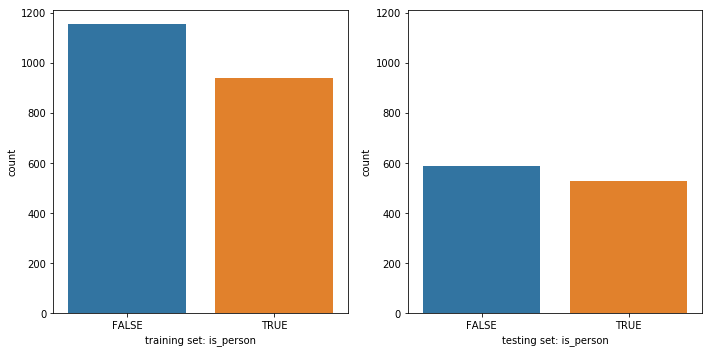

In [7]:
# (b) # Your Code goes here:
plt.subplots(1, 2, figsize=(10,5))
plt.subplots
plt.subplot(1,2,1)
ax1 = sns.countplot(x = "is_person", data = image_A_train)
ax1.set_xticklabels(['FALSE', 'TRUE'])
plt.xlabel('training set: is_person')
plt.subplot(1,2,2,sharey=ax1)
ax2 = sns.countplot(x = "is_person", data = image_A_test)
ax2.set_xticklabels(['FALSE', 'TRUE'])
plt.xlabel('testing set: is_person')
plt.tight_layout()
plt.show()

(c) ***Your answer goes here:***

The distribution in the two data sets are almost balanced. So in this case, the classification accuracy is a good measurement.

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

(a) ***Your answer goes here:***

We can use the dummy classifier as the baseline.

In [8]:
# (b) # Your Code goes here:
dummy_classifier = DummyClassifier(strategy="stratified", random_state = 100)
dummy_classifier.fit(X_tr, y_tr)
y_dummy_pred = dummy_classifier.predict(X_tst)
baseline = accuracy_score(y_tst, y_dummy_pred)
print("The classification accuracy of the baseline is:", baseline)

The classification accuracy of the baseline is: 0.504941599281222


### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

In [9]:
# (a) # Your Code goes here:
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(X_tr, y_tr)
y_log_pred = logisticRegr.predict(X_tst)
acc_log = accuracy_score(y_tst, y_log_pred)
print("The classification accuracy of the Logistic Regression classifier is:", acc_log)

The classification accuracy of the Logistic Regression classifier is: 0.5265049415992812


(b) ***Your answer goes here:***

The accuracy of the Logistic Regression classifier is slightly better than the baseline. By checking out the 'y_log_pred', it is found that everything has been classified as class '0'.

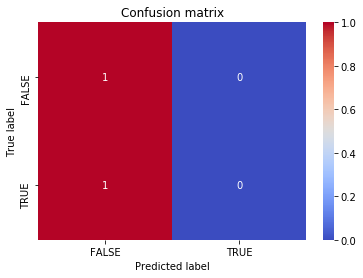

In [10]:
# (c) # Your Code goes here:
cm = confusion_matrix(y_tst, y_log_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, cmap='coolwarm')
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cm_norm, classes=['FALSE', 'TRUE'])

(d) ***Your answer goes here:***

WHY ALL ZERO????

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(d)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

(a) ***Your answer goes here:***

The parameters of the preprocessing should be based on the training set. But we apply the preprocessing to both the training and testing sets. However the parameter we get would be more suitable for training set.

In [11]:
# (b) # Your Code goes here:
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_tst_sc = scaler.transform(X_tst)

The classification accuracy of the Logistic Regression classifier is: 0.6433063791554358


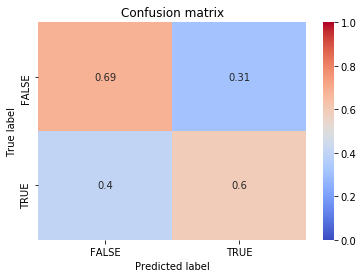

In [12]:
# (c) # Your Code goes here:
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(X_tr_sc, y_tr)
y_log_pred = logisticRegr.predict(X_tst_sc)
acc_log = accuracy_score(y_tst, y_log_pred)
print("The classification accuracy of the Logistic Regression classifier is:", acc_log)
cm = confusion_matrix(y_tst, y_log_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=['FALSE', 'TRUE'])

(d) ***Your answer goes here:***

The accuracy raised by about 0.12 compared to Q2.2

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

(a) ***Your answer goes here:***

For several possible values of a parameter, we can use cross-validation and then choose the parameter value that gives the lowest cross-validation average error. It is often used for parameter tuning by doing cross-validation for several (or many) possible values of a parameter and choosing the parameter value that gives the lowest cross-validation average error.

In [13]:
# (b) # Your Code goes here:

data_path_train = os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv')
data_path_test = os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv')
image_B_train = pd.read_csv(data_path_train)
image_B_test = pd.read_csv(data_path_test)

X_train = image_B_train[image_B_train.columns[0:500]]
y_train = image_B_train['is_person']
X_test = image_B_test[image_B_test.columns[0:500]]
y_test = image_B_test['is_person']


In [46]:
# (c) # Your Code goes here:
C = np.logspace(-5,5,11)
#C = np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 1e4, 1e5])
N = len(C)
scores = [0 for x in range(N)]
for i, para in enumerate (C):
    logisticRegr = LogisticRegression(solver='lbfgs', C = para)
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores[i] = cross_val_score(logisticRegr, X_train, y_train, cv=cv)
    
scores



[array([0.56563246, 0.61336516, 0.54653938, 0.52870813, 0.55980861]),
 array([0.66825776, 0.6849642 , 0.70405728, 0.6507177 , 0.63636364]),
 array([0.67303103, 0.74224344, 0.73031026, 0.6937799 , 0.65789474]),
 array([0.66825776, 0.71360382, 0.69451074, 0.69617225, 0.66985646]),
 array([0.65871122, 0.65871122, 0.65155131, 0.68181818, 0.65550239]),
 array([0.64200477, 0.64200477, 0.6300716 , 0.6722488 , 0.64832536]),
 array([0.64439141, 0.6372315 , 0.62052506, 0.66267943, 0.6507177 ]),
 array([0.64439141, 0.63484487, 0.61813842, 0.66267943, 0.64593301]),
 array([0.64439141, 0.6372315 , 0.62052506, 0.66267943, 0.64832536]),
 array([0.64439141, 0.6372315 , 0.62052506, 0.66267943, 0.64832536]),
 array([0.64439141, 0.6372315 , 0.61813842, 0.66267943, 0.6507177 ])]

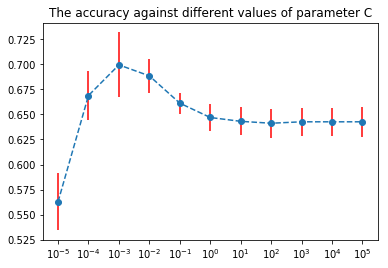

The optimal value for the parameter C is:  0.001 , with the best accuracy of  0.6994518733370636


In [47]:
# (d) # Your Code goes here:
mean = [0 for x in range(N)]
sd = [0 for x in range(N)]
for ii in range(N):
    mean[ii] = np.mean(scores[ii])
    sd[ii] = np.std(scores[ii])
    

plt.figure()
plt.errorbar(x = C, y = mean, yerr = sd, fmt = '--o', ecolor = 'r', capthick = 2)
plt.xscale('log')
plt.xticks(C)
plt.title("The accuracy against different values of parameter C")
plt.show()

idx = sorted(range(len(mean)), key=lambda k: mean[k])
optim = C[idx[-1]]
op_acc = mean[idx[-1]]
print("The optimal value for the parameter C is: ", optim, ", with the best accuracy of ", op_acc)

(e) ***Your answer goes here:***

There is a big leap in accuracy when parameter C increases from 1e-5 to 1e-4. The highest accuracy happened at C=1e-3 and then it began to decrease as the value of C increases. After 10, the further increase in C do not affect the accuracy much.C is the inverse of regularization strength. smaller values specify stronger regularization. So, the larger the value of C, the more likely the model becomes overfitting. We should choose a reasonable small value for C.

In [16]:
# (f) # Your Code goes here:

logisticRegr = LogisticRegression(solver='lbfgs', C = 0.01)
logisticRegr.fit(X_train, y_train)
y_log_pred = logisticRegr.predict(X_test)
acc_log = accuracy_score(y_test, y_log_pred)
print("The classification accuracy of the Logistic Regression classifier is:", acc_log)


The classification accuracy of the Logistic Regression classifier is: 0.6792452830188679


### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***

The feature_importances property in Random-Forest can return a value for each attribute. The larger the value the more important the attribute, the more impact this attribute has on the result. This is similar as the weight in the linear regression.

In [151]:
# (b) # Your Code goes here:
#target='Disbursed'

X_rows_tr = X_train.iloc[:,0:500].values
X_rows_tst = X_test.iloc[:,0:500].values
RF = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy')
RF.fit(X_rows_tr, y_train)
y_RF_pred = RF.predict(X_rows_tst)
Y_train_pre = RF.predict(X_train)
acc_tr = accuracy_score(y_train, Y_train_pre)
acc_tst = accuracy_score(y_test, y_RF_pred)
print("The classification accuracy of the RandomForest classifier for training set is: ", acc_tr, "\n")
print("The classification accuracy of the RandomForest classifier for testing set is: ", acc_tst)


The classification accuracy of the RandomForest classifier for training set is:  1.0 

The classification accuracy of the RandomForest classifier for testing set is:  0.6990116801437556


(c) ***Your answer goes here:***

Here the model we train is a decision tree model which always has an accuracy of 100% on the training set. The model is a perfect fit on training set, however the accuracy on testing set is 69.9%.

In [18]:
# (d) # Your Code goes here:
imp = RF.feature_importances_
idx_fea = sorted(range(len(imp)), key=lambda k: imp[k], reverse=True)
id = idx_fea[:10]
X_train.columns[id]
print("The 10 most important features (in descending order of importance) are listed as below: \n", X_train.columns[idx_fea[:10]])

The 10 most important features (in descending order of importance) are listed as below: 
 Index(['dim21', 'dim51', 'dim360', 'dim76', 'dim479', 'dim4', 'dim263',
       'dim283', 'dim461', 'dim343'],
      dtype='object')


### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

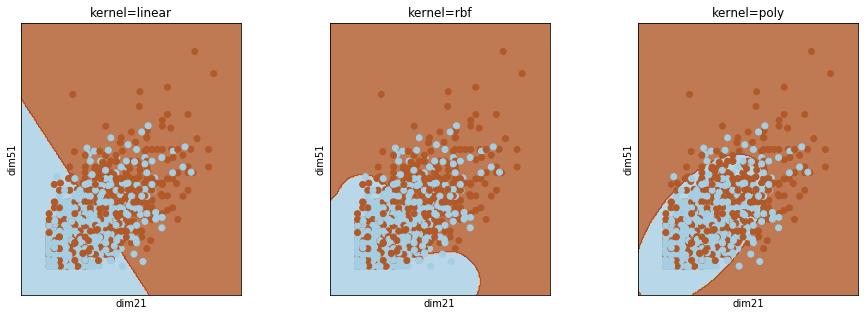

In [120]:
# (a) # Your Code goes here:
X = X_train[['dim21', 'dim51']].values
y = y_train.values

C = 1.0
lin_SVM = SVC(C=C, kernel='linear') 
lin_SVM.fit(X, y)
rbf_SVM = SVC(C=C, kernel='rbf', gamma='auto')
rbf_SVM.fit(X, y)
poly_SVM = SVC(C=C, kernel='poly', degree=2)
poly_SVM.fit(X, y)

SVM_clf = [lin_SVM, rbf_SVM, poly_SVM]
plot_SVM_DecisionBoundary(SVM_clf, X, y, title = ['kernel=linear', 'kernel=rbf', 'kernel=poly'], labels=['dim21', 'dim51'])

(b) ***Your answer goes here:***

In linear kernel case, the decision boundary is a straight line. In rbf kernel case, the parameter gamma is set to 'auto' which takes the value of 1/n_features. The relationship between the output and input follows RBF function. In poly kernel case, 'degree' is the degree of the polynomial kernel function. In our case, the result "is_person" does not have a linear relationship with any attributes, we should use rbf kernel here.

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

In [99]:
# (a) # Your Code goes here:

C = np.logspace(-2,3,6)
deg = np.linspace(1, 5, 5)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

length = len(C) * len(deg)
feature_list=['C','Degree','acc']
df = pd.DataFrame(0, index=np.arange(length), columns=feature_list, dtype=float)

n = 0
for i in range(len(C)):
    for j in range(len(deg)):
        poly_SVM = SVC(C=C[i], kernel='poly', degree=deg[j])
        scores = cross_val_score(poly_SVM, X_train, y_train, cv=cv)
        df.iloc[n]['C'] = C[i]
        df.iloc[n]['Degree'] = deg[j]
        df.iloc[n]['acc'] = np.mean(scores)
        n += 1
        print("C = ", C[i], "degree = ", deg[j], "accuracy = ", np.mean(scores))


C =  0.01 degree =  1.0 accuracy =  0.5527834557102237
C =  0.01 degree =  2.0 accuracy =  0.5508741478343288
C =  0.01 degree =  3.0 accuracy =  0.5508741478343288
C =  0.01 degree =  4.0 accuracy =  0.5508741478343288
C =  0.01 degree =  5.0 accuracy =  0.5503956789348072
C =  0.1 degree =  1.0 accuracy =  0.6836863801943566
C =  0.1 degree =  2.0 accuracy =  0.5738098228865721
C =  0.1 degree =  3.0 accuracy =  0.5604275387970904
C =  0.1 degree =  4.0 accuracy =  0.5542154366171449
C =  0.1 degree =  5.0 accuracy =  0.5527823137796759
C =  1.0 degree =  1.0 accuracy =  0.6927715796325268
C =  1.0 degree =  2.0 accuracy =  0.6684027817428143
C =  1.0 degree =  3.0 accuracy =  0.6765184821459159
C =  1.0 degree =  4.0 accuracy =  0.6235066403261353
C =  1.0 degree =  5.0 accuracy =  0.6029747290769775
C =  10.0 degree =  1.0 accuracy =  0.666511744755684
C =  10.0 degree =  2.0 accuracy =  0.6612371675554692
C =  10.0 degree =  3.0 accuracy =  0.678929097532288
C =  10.0 degree =  4.

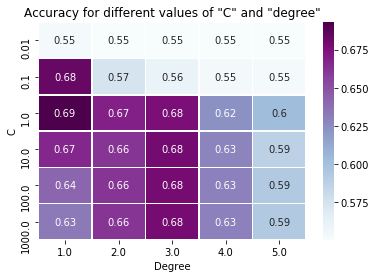

In [152]:
# (b) # Your Code goes here:
data = df.pivot('C', 'Degree', 'acc')
ax = sns.heatmap(data, annot=True, linewidths=.5, cmap = 'BuPu')
ax.set_title('Accuracy for different values of "C" and "degree"')
plt.show()

In [150]:
# (c) # Your Code goes here:
acc = df['acc']
idx = sorted(range(len(acc)), key=lambda k: acc[k], reverse=True)
deg_op = df.iloc[idx[0]]['Degree']
C_op = df.iloc[idx[0]]['C']
poly_SVM = SVC(C=C_op, kernel='poly', degree=deg_op)
poly_SVM.fit(X_train, y_train)
y_pred = poly_SVM.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print("The accuracy of (polynomial-kernel) SVC on testing set is: ",acc_test)

The accuracy of (polynomial-kernel) SVC on testing set is:  0.6891284815813118


(d) ***Your answer goes here:***

The accuracy for Logistic Classifier is 67.9%. The (polynomial-kernel) SVC has a higher accuracy of 68.9%. SVM tries to find the widest possible separating margin, while Logistic Regression optimizes the log likelihood function, with probabilities modeled by the sigmoid function. Thus, SVM find a solution which is as fare as possible for the two categories while Logistic Classifier dose not have this property. Also, Logistic Regression produces probabilistic values while SVM produces 1 or 0.

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***

No. In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The objective of the support vector machine algorithm is to find the hyperplane that has the maximum margin. The difference lies in the loss fuction — SVM minimizes hinge loss while logistic regression minimizes logistic loss. Logistic loss diverges faster than hinge loss. So, in general, it will be more sensitive to outliers. 

(b) ***Your answer goes here:***

The accuracy may not exhibit big difference with one parameter fixed and another changes. For example, when C=0.01, the accuracy is about 0.55 for all five degrees. By adjusting two parameters, the pattern is more obvious.

(c) ***Your answer goes here:***

By using cross-validation, we can continuously tuning the hyperparameter until the best one is found within our limits. The K-fold cross-validation technique consists of assessing how good the model will be on an independent dataset. A score for each of the k runs is computed and then the scores obtained are averaged to calculate a global score. We build models for each combination of the two algorithm hyper-parameter values within the limits specified. Only the best combination of the two hyper-parameters values used to train the best model is retained. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)